## Problem Statement:

###  A car company has released a new SUV in the market. Using the previous data about the sales of their SUV's, they want to predict the category of people who might be interested in buying this. 

### # what factors made people more interested in buying SUV?

<h3>Data set:</h3>
<ul>
    <li>User ID: unique id</li>
    <li>Gender : male or female</li>
    <li>Age    : age of customer</li>
    <li>Estimated Salary: estiamation of salary of customer</li>
    <li>Purchesed : target variable</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
dataset = pd.read_csv("suv_data.csv")
print(len(dataset.index))

400


In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Analyzing Data

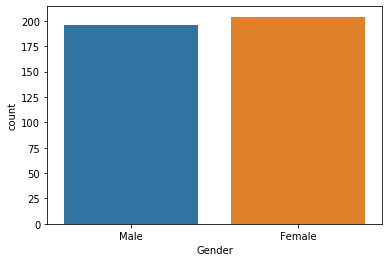

In [5]:
sns.countplot(x="Gender", data=dataset)

In [16]:
dataset.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

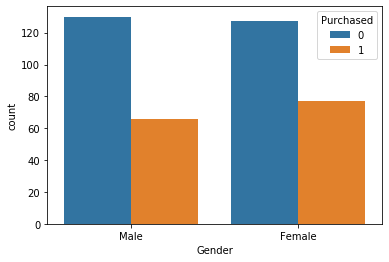

In [63]:
sns.countplot(x="Gender", hue="Purchased" ,data=dataset)

In [27]:
dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [38]:
male_purchased = len(dataset[(dataset["Purchased"] == 1) & (dataset["Gender"] == "Male")])
male_not_purchased = len(dataset[(dataset["Purchased"] == 0) & (dataset["Gender"] == "Male")])

female_purchased = len(dataset[(dataset["Purchased"] == 1) & (dataset["Gender"] == "Female")])
female_not_purchased = len(dataset[(dataset["Purchased"] == 0) & (dataset["Gender"] == "Female")])

In [39]:
print("# of male purchased car: ",male_purchased)
print("# of male not purchased car: ",male_not_purchased)
print("# of female purchased car: ",female_purchased)
print("# of female not purchased car: ",female_not_purchased)

# of male purchased car:  66
# of male not purchased car:  130
# of female purchased car:  77
# of female not purchased car:  127


From given dataset of 400 customers in which approximately 204 females and 196 males.<br>
Only 66 male and 77 females purchased car and 130 male's and 127 female's not purchased the car<br>
So totaly 143 customers purchsed car and 257 not purchased car

In [45]:
print("Minimum age of customer: ",min(dataset.Age))
print("Maximum age of customer: ",max(dataset.Age))

Minimum age of customer:  18
Maximum age of customer:  60


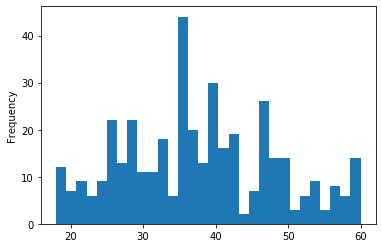

In [51]:
dataset["Age"].plot.hist(bins=30)

Since Age is a countinuous variable , converting it to Age groups.<br>
<ul>
    <li>age 18-30 = 1</li>
    <li>age 31-40 = 2</li>
    <li>age 41-50 = 3</li>
    <li>age 51-60 = 4</li>

In [90]:
# <dataset>.loc[<filter1> & (<filter2>),'<variable>']='<value>'
dataset.loc[(dataset['Age'] >= 18) & (dataset['Age'] <= 30),'age']=1
dataset.loc[(dataset['Age'] >= 31) & (dataset['Age'] <= 40),'age']=2
dataset.loc[(dataset['Age'] >= 41) & (dataset['Age'] <= 50),'age']=3
dataset.loc[(dataset['Age'] >= 51) & (dataset['Age'] <= 60),'age']=4

In [91]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age,Estimated_Salary
0,15624510,Male,19,19000,0,1,1.0
1,15810944,Male,35,20000,0,2,1.0
2,15668575,Female,26,43000,0,1,2.0
3,15603246,Female,27,57000,0,1,3.0
4,15804002,Male,19,76000,0,1,4.0


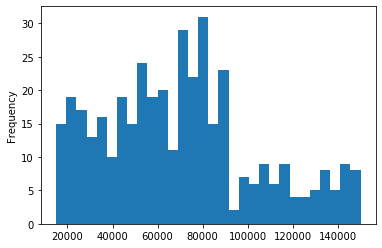

In [92]:
dataset["EstimatedSalary"].plot.hist(bins=30)

Since Estimated Salary is a countinuous variable , converting it to Salary groups.<br>
<ul>
    <li>Salary   15,000-30,000 = 1</li>
    <li>Salary   30,000-45,000 = 2</li>
    <li>Salary   45,000-60,000 = 3</li>
    <li>Salary   60,000-90,000 = 4</li>
    <li>Salary  90,000-120,000 = 5</li>
    <li>Salary 120,000-150,000 = 6</li>

In [93]:
print("Minimum Estimated Salary of customer: ",min(dataset.EstimatedSalary))
print("Maximum Estimated Salary of customer: ",max(dataset.EstimatedSalary))

Minimum Estimated Salary of customer:  15000
Maximum Estimated Salary of customer:  150000


In [100]:
# <dataset>.loc[<filter1> & (<filter2>),'<variable>']='<value>'
dataset.loc[(dataset['EstimatedSalary'] >= 15000) & (dataset['EstimatedSalary'] <= 30000),'Estimated_Salary']=1
dataset.loc[(dataset['EstimatedSalary'] >= 30000) & (dataset['EstimatedSalary'] <= 45000),'Estimated_Salary']=2
dataset.loc[(dataset['EstimatedSalary'] >= 45000) & (dataset['EstimatedSalary'] <= 60000),'Estimated_Salary']=3
dataset.loc[(dataset['EstimatedSalary'] >= 60000) & (dataset['EstimatedSalary'] <= 90000),'Estimated_Salary']=4
dataset.loc[(dataset['EstimatedSalary'] >= 90000) & (dataset['EstimatedSalary'] <= 120000),'Estimated_Salary']=5
dataset.loc[(dataset['EstimatedSalary'] >= 120000) & (dataset['EstimatedSalary'] <= 150000),'Estimated_Salary']=6

In [101]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age,Estimated_Salary
0,15624510,Male,19,19000,0,1,1.0
1,15810944,Male,35,20000,0,2,1.0
2,15668575,Female,26,43000,0,1,2.0
3,15603246,Female,27,57000,0,1,3.0
4,15804002,Male,19,76000,0,1,4.0


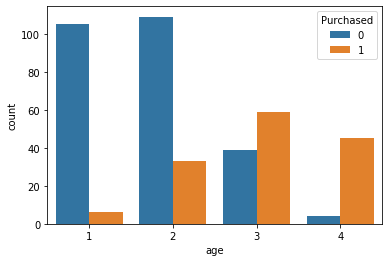

In [102]:
sns.countplot(x="age", hue="Purchased" ,data=dataset)

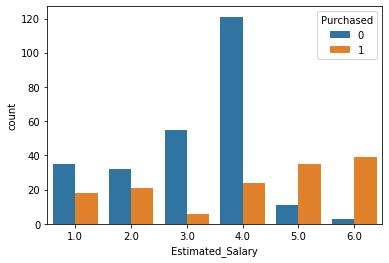

In [103]:
sns.countplot(x='Estimated_Salary', hue="Purchased" ,data=dataset)

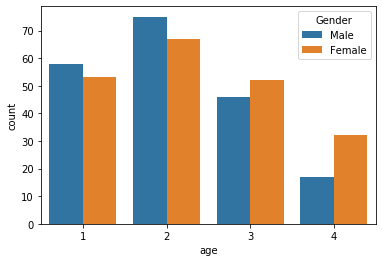

In [104]:
sns.countplot(x="age", hue="Gender" ,data=dataset)

In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
User ID             400 non-null int64
Gender              400 non-null object
Age                 400 non-null int64
EstimatedSalary     400 non-null int64
Purchased           400 non-null int64
age                 400 non-null int64
Estimated_Salary    400 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 22.0+ KB


## Data Wrangling

#### Clean the data by removing the Nan values and unnecessary columns in the dataset

In [106]:
dataset.isnull().sum()

User ID             0
Gender              0
Age                 0
EstimatedSalary     0
Purchased           0
age                 0
Estimated_Salary    0
dtype: int64

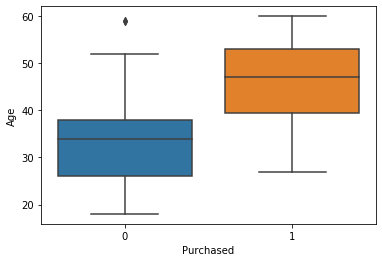

In [107]:
sns.boxplot(x="Purchased",y="Age",data=dataset)

In [108]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age,Estimated_Salary
0,15624510,Male,19,19000,0,1,1.0
1,15810944,Male,35,20000,0,2,1.0
2,15668575,Female,26,43000,0,1,2.0
3,15603246,Female,27,57000,0,1,3.0
4,15804002,Male,19,76000,0,1,4.0


In [109]:
dataset.drop(['User ID','Age','EstimatedSalary'], axis=1, inplace=True)

In [110]:
dataset.head()

,Gender,Purchased,age,Estimated_Salary
0,Male,0,1,1.0
1,Male,0,2,1.0
2,Female,0,1,2.0
3,Female,0,1,3.0
4,Male,0,1,4.0


### Categorical to dummy variables

In [112]:
Gender = pd.get_dummies(dataset["Gender"],drop_first=True)
Gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [114]:
Age = pd.get_dummies(dataset['age'], drop_first=True)
Age.head()

,2,3,4
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [115]:
EstimatedSalary = pd.get_dummies(dataset['Estimated_Salary'], drop_first=True)
EstimatedSalary.head()

,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


### conactinate all the data

In [116]:
dataset = pd.concat([dataset,Gender,Age,EstimatedSalary], axis=1)

In [117]:
dataset.head()

,Gender,Purchased,age,Estimated_Salary,Male,2,3,4,2.0,3.0,4.0,5.0,6.0
0,Male,0,1,1.0,1,0,0,0,0,0,0,0,0
1,Male,0,2,1.0,1,1,0,0,0,0,0,0,0
2,Female,0,1,2.0,0,0,0,0,1,0,0,0,0
3,Female,0,1,3.0,0,0,0,0,0,1,0,0,0
4,Male,0,1,4.0,1,0,0,0,0,0,1,0,0


In [118]:
dataset.drop(['Gender','age','Estimated_Salary'], axis=1, inplace=True)

In [119]:
dataset.head()

,Purchased,Male,2,3,4,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0


## Train & Test Data

#### Build the model on the train data and predict the output on the test data

In [120]:
x = dataset.drop(['Purchased'],axis=1)
y = dataset["Purchased"]

In [123]:
x.head()

,Male,2,3,4,2.0,3.0,4.0,5.0,6.0
0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0


In [124]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
classifier = LogisticRegression(random_state=0)

In [130]:
classifier.fit(X_train,y_train)

c:\users\ajay thakur\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
y_pred = classifier.predict(X_test)

## Accuracy Check

In [133]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [134]:
print(confusion_matrix(y_test,y_pred))

[[49  9]
 [ 8 34]]


In [135]:
print(accuracy_score(y_test,y_pred))

0.83
